<center><h1>Final Project</h1></center><br>
EMAT 22110 - Data in Emerging Media and Technology <br>
Author: Hannah Haswell <br>
Created: 4/26/21 <br>
Last Updated: 4/26/21

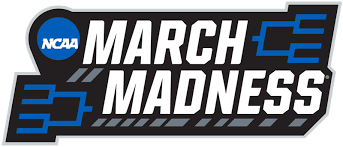

# Purpose

In this data report, I will be analyzing a my March Madness data from the teams that made it to the final four in the 2021 NCAA Tournament as well as those colleges admissions, fundings, size, and student demographics data. I chose this topic because I have plyed basketball all throughout high school and now that I am not actively playing I enjoy watching college basketball. I will show a variety of analyses and displays of data that we will be able to draw conclusions from about the final four March Madness teams, as well as their college data.

## 1. Overview

My <b>question</b> that I want to answer for this report is: What about a university makes their Men’s basketball team successful in March Madness?

To do this I will:
- Look at March Madness data from 2019, 2020, and 2021
- Look at the colleges that made it to the Final Four in the March Madness 2021 tournament
    - UCLA
    - Gonzaga
    - Baylor
    - Houston
- Look at college data from those four colleges
    -Including:
        -admissions
        -fundings
        -size
        -student demographics
        
Below, I am going to load in the libraries I will be using for this report and all the files of data I will be using with a short description.

In [1]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from scipy import stats

<b>College Data</b><br>
Source: https://www.kaggle.com/yashgpt/us-college-data?select=College_Data.csv <br>
Content:<br>
    -Private A factor with levels No and Yes indicating private or public university<br>
    -Apps Number of applications received<br>
    -Accept Number of applications accepted<br>
    -Enroll Number of new students enrolled<br>
    -Top10perc Pct. new students from top 10% of H.S. class<br>
    -Top25perc Pct. new students from top 25% of H.S. class<br>
    -F.Undergrad Number of fulltime undergraduates<br>
    -P.Undergrad Number of parttime undergraduates<br>
    -Outstate Out-of-state tuition<br>
    -Room.Board Room and board costs<br>
    -Books Estimated book costs<br>
    -Personal Estimated personal spending<br>
    -PhD Pct. of faculty with Ph.D.’s<br>
    -Terminal Pct. of faculty with terminal degree<br>
    -S.F.Ratio Student/faculty ratio<br>
    -perc.alumni Pct. alumni who donate<br>
    -Expend Instructional expenditure per student<br>
    -Grad.Rate Graduation rate<br>

In [13]:
ColData = pd.read_csv(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\Final Project\College_Data.csv")
ColData.head()


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


<b>Men's College Basketball Stats 2019</b><br>
Source: https://sportsdata.io/developers/data-dictionary/ncaa-basketball?groups=50 <br>
Content:<br>
1. Base<br>
-Conference<br>
-Game<br>
-Period<br>
-Player<br>
-Season<br>
-Stadium<br>
-Team<br>
-Tournament<br>
2.Tier 1: Scores <br>
-Game<br>
-Period<br>
-Stadium<br>
3. Tier 2: Team Stats <br>
-TeamGame<br>
-TeamSeason<br>
4. Tier 3: Player Stats<br>
-BoxScore<br>
-Game<br>
-Period<br>
-PlayerGame<br>
-PlayerSeason<br>
-Stadium<br>
-TeamGame<br>

In [3]:
cbb19 = pd.read_csv(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\Final Project\cbb19.csv")
cbb19.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,35.3,25.9,61.4,43.4,36.3,30.4,72.0,7.0,E8,1.0
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2,E8,1.0
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,...,30.2,28.4,52.1,47.9,36.2,33.5,76.0,10.0,S16,1.0
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0


<b>Men's College Basketball Stats 2020</b><br>
Source: https://sportsdata.io/developers/data-dictionary/ncaa-basketball?groups=50 <br>
Content:<br>
1. Base<br>
-Conference<br>
-Game<br>
-Period<br>
-Player<br>
-Season<br>
-Stadium<br>
-Team<br>
-Tournament<br>
2.Tier 1: Scores <br>
-Game<br>
-Period<br>
-Stadium<br>
3. Tier 2: Team Stats <br>
-TeamGame<br>
-TeamSeason<br>
4. Tier 3: Player Stats<br>
-BoxScore<br>
-Game<br>
-Period<br>
-PlayerGame<br>
-PlayerSeason<br>
-Stadium<br>
-TeamGame<br>

In [4]:
cbb20 = pd.read_csv(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\Final Project\cbb20.csv")
cbb20.head()

,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,1,Kansas,B12,30,28,116.1,87.7,0.9616,53.7,43.7,...,32.6,26.4,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8
1,2,Baylor,B12,30,26,114.5,88.4,0.9513,49.4,45.2,...,35.8,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5
2,3,Gonzaga,WCC,33,31,121.3,94.3,0.9472,57.5,47.6,...,33.6,22.7,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7
3,4,Dayton,A10,31,29,119.5,93.4,0.9445,59.7,46.6,...,26.4,26.6,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8
4,5,Michigan St.,B10,31,22,114.8,91.3,0.9326,52.6,43.3,...,32.8,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2


<b>Men's College Basketball Stats 2021</b><br>
Source: https://sportsdata.io/developers/data-dictionary/ncaa-basketball?groups=50 <br>
Content:<br>
1. Base<br>
-Conference<br>
-Game<br>
-Period<br>
-Player<br>
-Season<br>
-Stadium<br>
-Team<br>
-Tournament<br>
2.Tier 1: Scores <br>
-Game<br>
-Period<br>
-Stadium<br>
3. Tier 2: Team Stats <br>
-TeamGame<br>
-TeamSeason<br>
4. Tier 3: Player Stats<br>
-BoxScore<br>
-Game<br>
-Period<br>
-PlayerGame<br>
-PlayerSeason<br>
-Stadium<br>
-TeamGame<br>

In [5]:
cbb21 = pd.read_csv(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\Final Project\cbb21.csv")
cbb21.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
0,Michigan,B10,24,20,118.1,91.1,0.9521,54.9,44.9,16.3,...,24.8,28.9,24.5,53.3,42.3,38.7,33.5,66.9,7.2,1.0
1,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,30.9,27.0,31.7,54.1,48.1,41.8,34.0,68.8,6.6,1.0
2,Illinois,B10,29,23,117.7,90.4,0.9539,55.6,46.6,18.2,...,22.2,39.2,30.5,55.3,45.4,37.6,32.7,70.7,8.9,1.0
3,Gonzaga,WCC,26,26,125.4,89.8,0.9791,61.0,47.5,16.1,...,23.4,36.7,25.9,64.0,46.8,36.5,32.5,74.6,8.5,1.0
4,Iowa,B10,29,21,123.5,95.7,0.9491,54.6,48.3,13.3,...,28.6,32.0,22.6,52.4,45.8,38.6,34.8,70.0,5.6,2.0


<b>March Machine Learning Mania 2021</b><br>
Source: https://www.kaggle.com/c/ncaam-march-mania-2021/data<br>
Content:<br>
    <u>MTeams (Men's Teams)</u><br>
        -TeamID - a 4 digit id number, from 1000-1999, uniquely identifying each NCAA® men's team.<br>
        -TeamName - a compact spelling of the team's college name, 16 characters or fewer.<br>
        -FirstD1Season - the first season in our dataset that the school was a Division-I school.<br>
        -LastD1Season - the last season in our dataset that the school was a Division-I school.<br>
    <u>MTeamSpell (Men's Team Name Spelling)</u><br>
        -TeamNameSpelling - this is the spelling of the team name.<br>
        -TeamID - this identifies the TeamID for the team that has the alternative spelling (as described in MTeams.csv).<br>
    <u>TCompResults (Tournament Compact Results</u><br>
    -DayNum=134 or 135 (Tue/Wed) - play-in games to get the tournament field down to the final 64 teams<br>
    -DayNum=136 or 137 (Thu/Fri) - Round 1, to bring the tournament field from 64 teams to 32 teams<br>
    -DayNum=138 or 139 (Sat/Sun) - Round 2, to bring the tournament field from 32 teams to 16 teams<br>
    -DayNum=143 or 144 (Thu/Fri) - Round 3, otherwise known as "Sweet Sixteen", to bring the tournament field from 16 teams to 8 teams<br>
    -DayNum=145 or 146 (Sat/Sun) - Round 4, otherwise known as "Elite Eight" or "regional finals", to bring the tournament field from 8 teams to 4 teams<br>
    -DayNum=152 (Sat) - Round 5, otherwise known as "Final Four" or "national semifinals", to bring the tournament field from 4 teams to 2 teams<br>
    -DayNum=154 (Mon) - Round 6, otherwise known as "national final" or "national championship", to bring the tournament field from 2 teams to 1 champion team<br>
    <u>TDetResults (Tournament Detailed Results)</u><br>
        -This file provides team-level box scores for many NCAA® tournaments, starting with the 2003 season. All games listed in the MNCAATourneyCompactResults file since the 2003 season should exactly be present in the MNCAATourneyDetailedResults file.<br>
    <u>TSeedRoundSlot (Tournament Seed Round Slot)</u><br>
        -Seed - this is the tournament seed of the team.<br>
        -GameRound - this is the round during the tournament that the game would occur in, where Round 0 (zero) is for the play-in games, Rounds 1/2 are for the first weekend, Rounds 3/4 are for the second weekend, and Rounds 5/6 are the national semifinals and finals.<br>
        -GameSlot - this is the game slot that the team would be playing in, during the given GameRound.<br>
        -EarlyDayNum, LateDayNum - these fields describe the earliest possible, and latest possible, DayNums that the game might be played on.<br>
    <u>TSeeds (Tournament Seeds)</u><br>
        -Season - the year that the tournament was played in<br>
        -Seed - this is a 3/4-character identifier of the seed, where the first character is either W, X, Y, or Z (identifying the region the team was in) and the next two digits (either 01, 02, ..., 15, or 16) tell you the seed within the region.<br>
        -TeamID - this identifies the id number of the team, as specified in the MTeams.csv file
<br>
    <u>TSlots (Tournament Slots)</u><br>
        -Season - this is the year of the associated entry in MSeasons.csv (the year in which the final tournament occurs)<br>
        -Slot - this uniquely identifies one of the tournament games.<br>
        -StrongSeed - this indicates the expected stronger-seeded team that plays in this game. <br>
        -WeakSeed - this indicates the expected weaker-seeded team that plays in this game, assuming all favored teams have won so far.<br>

In [6]:
MTeams = pd.read_csv(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\Final Project\MDataFiles_Stage2\MTeams.csv")
MTeams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2021
1,1102,Air Force,1985,2021
2,1103,Akron,1985,2021
3,1104,Alabama,1985,2021
4,1105,Alabama A&M,2000,2021


In [7]:
MTeamSpell = pd.read_csv(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\Final Project\MDataFiles_Stage2\MTeamSpellings.csv")
MTeamSpell.head()

,TeamNameSpelling,TeamID
0,a&m-corpus chris,1394
1,a&m-corpus christi,1394
2,abilene chr,1101
3,abilene christian,1101
4,abilene-christian,1101


In [8]:
TCompResults = pd.read_csv(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\Final Project\MDataFiles_Stage2\MNCAATourneyCompactResults.csv")
TCompResults.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [9]:
TDetResults = pd.read_csv(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\Final Project\MDataFiles_Stage2\MNCAATourneyDetailedResults.csv")
TDetResults.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [10]:
TSeedRoundSlot = pd.read_csv(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\Final Project\MDataFiles_Stage2\MNCAATourneySeedRoundSlots.csv")
TSeedRoundSlot.head()

,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
0,W01,1,R1W1,136,137
1,W01,2,R2W1,138,139
2,W01,3,R3W1,143,144
3,W01,4,R4W1,145,146
4,W01,5,R5WX,152,152


In [11]:
TSeeds = pd.read_csv(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\Final Project\MDataFiles_Stage2\MNCAATourneySeeds.csv")
TSeeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [31]:
TSlots = pd.read_csv(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\Final Project\MDataFiles_Stage2\MNCAATourneySlots.csv")
TSlots.head()

,Season,Slot,StrongSeed,WeakSeed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12


## 2. The Data

Below, I am pulling out the keys for each of my data sets so I can work with them throughout this report. By pulling out the keys for each data set, I found out that each data set has a type of object.

In [15]:
ColData.keys()

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [16]:
cbb19.keys()

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED'],
      dtype='object')

In [17]:
cbb20.keys()

Index(['RK', 'TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O',
       'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D',
       '3P_O', '3P_D', 'ADJ_T', 'WAB'],
      dtype='object')

In [18]:
cbb21.keys()

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED'],
      dtype='object')

In [23]:
MTeams.keys()

Index(['TeamID', 'TeamName', 'FirstD1Season', 'LastD1Season'], dtype='object')

In [25]:
MTeamSpell.keys()

Index(['TeamNameSpelling', 'TeamID'], dtype='object')

In [26]:
TCompResults.keys()

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT'],
      dtype='object')

In [27]:
TDetResults.keys()

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [28]:
TSeedRoundSlot.keys()

Index(['Seed', 'GameRound', 'GameSlot', 'EarlyDayNum', 'LateDayNum'], dtype='object')

In [29]:
TSeeds.keys()

Index(['Season', 'Seed', 'TeamID'], dtype='object')

In [32]:
TSlots.keys()

Index(['Season', 'Slot', 'StrongSeed', 'WeakSeed'], dtype='object')

## 3. Data Preparation

In [34]:
ColDatadf = pd.DataFrame(data = ColData)
ColDatadf

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [60]:
NEWColDatadf = ColDatadf[(ColDatadf["Unnamed: 0"] == 'Gonzaga University') | (ColDatadf["Unnamed: 0"] == 'Baylor University')]
NEWColDatadf

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
39,Baylor University,Yes,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.5,38,7503,72
227,Gonzaga University,Yes,1886,1524,526,31,67,2523,296,13000,4450,600,2400,78,90,14.7,32,9553,69


In [47]:
cbb21df = pd.DataFrame(data = cbb21)
cbb21df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
0,Michigan,B10,24,20,118.1,91.1,0.9521,54.9,44.9,16.3,...,24.8,28.9,24.5,53.3,42.3,38.7,33.5,66.9,7.2,1.0
1,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,30.9,27.0,31.7,54.1,48.1,41.8,34.0,68.8,6.6,1.0
2,Illinois,B10,29,23,117.7,90.4,0.9539,55.6,46.6,18.2,...,22.2,39.2,30.5,55.3,45.4,37.6,32.7,70.7,8.9,1.0
3,Gonzaga,WCC,26,26,125.4,89.8,0.9791,61.0,47.5,16.1,...,23.4,36.7,25.9,64.0,46.8,36.5,32.5,74.6,8.5,1.0
4,Iowa,B10,29,21,123.5,95.7,0.9491,54.6,48.3,13.3,...,28.6,32.0,22.6,52.4,45.8,38.6,34.8,70.0,5.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,Louisiana Tech,CUSA,27,21,102.7,93.4,0.7479,50.5,45.6,18.4,...,23.4,35.3,26.4,49.7,46.4,34.6,29.6,69.6,-1.7,NaN
343,Toledo,MAC,29,21,113.3,101.8,0.7743,54.3,48.3,15.5,...,30.7,28.5,23.4,52.5,51.0,37.7,29.5,69.1,-2.1,NaN
344,UAB,CUSA,27,22,102.5,94.6,0.7153,48.6,47.0,15.6,...,25.4,29.9,27.1,49.4,46.1,31.1,32.4,67.5,-2.7,NaN
345,Eastern Kentucky,OVC,27,22,101.5,102.3,0.4749,51.2,51.0,16.6,...,30.2,25.6,32.2,49.6,51.8,35.8,33.0,75.1,-3.8,NaN


In [74]:
NEWcbb21df = cbb21df[(cbb21df["TEAM"] == 'Gonzaga') | (cbb21df["TEAM"] == 'Baylor') | (cbb21df["TEAM"] == 'Houston') | (cbb21df["TEAM"] == 'UCLA')]
NEWcbb21df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
1,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,30.9,27.0,31.7,54.1,48.1,41.8,34.0,68.8,6.6,1.0
3,Gonzaga,WCC,26,26,125.4,89.8,0.9791,61.0,47.5,16.1,...,23.4,36.7,25.9,64.0,46.8,36.5,32.5,74.6,8.5,1.0
6,Houston,Amer,26,24,120.6,90.9,0.9626,51.3,42.9,16.3,...,28.0,30.7,42.4,49.9,43.0,35.5,28.5,65.0,4.0,2.0
43,UCLA,P12,26,17,112.3,97.5,0.8350,52.0,50.7,16.6,...,24.4,32.6,28.0,50.6,49.4,36.7,35.1,64.7,1.0,11.0


In [54]:
MTeamsdf = pd.DataFrame(data = MTeams)
MTeamsdf

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2021
1,1102,Air Force,1985,2021
2,1103,Akron,1985,2021
3,1104,Alabama,1985,2021
4,1105,Alabama A&M,2000,2021
...,...,...,...,...
366,1467,Merrimack,2020,2021
367,1468,Bellarmine,2021,2021
368,1469,Dixie St,2021,2021
369,1470,Tarleton St,2021,2021


In [57]:
NEWMTeamsdf = MTeamsdf[(MTeamsdf["TeamName"] == 'Gonzaga') | (MTeamsdf["TeamName"] == 'Baylor')| (MTeamsdf["TeamName"] == 'UCLA') | (MTeamsdf["TeamName"] == 'Houston')]
NEWMTeamsdf

,TeamID,TeamName,FirstD1Season,LastD1Season
23,1124,Baylor,1985,2021
110,1211,Gonzaga,1985,2021
121,1222,Houston,1985,2021
316,1417,UCLA,1985,2021


In [61]:
TCompResultsdf = pd.DataFrame(data = TCompResults)
TCompResultsdf

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
2246,2019,146,1120,77,1246,71,N,1
2247,2019,146,1277,68,1181,67,N,0
2248,2019,152,1403,61,1277,51,N,0
2249,2019,152,1438,63,1120,62,N,0


In [70]:
NEWTCompResultsdf = TCompResultsdf[(TCompResultsdf["Season"] == '')]
NEWTCompResultsdf

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT


In [68]:
TSeedsdf = pd.DataFrame(data = TSeeds)
TSeedsdf

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
2349,2021,Z12,1457
2350,2021,Z13,1317
2351,2021,Z14,1159
2352,2021,Z15,1331


In [72]:
NEWTSeedsdf = TSeedsdf[(TSeedsdf["TeamID"] == '1124') | (TSeedsdf["TeamID"] == '1211') | (TSeedsdf["TeamID"] == '1222') | (TSeedsdf["TeamID"] == '1417')]
NEWTSeedsdf

,Season,Seed,TeamID


In [66]:
TSlotsdf = pd.DataFrame(data = TSlots)
TSlotsdf

,Season,Slot,StrongSeed,WeakSeed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12
...,...,...,...,...
2313,2021,R6CH,R5WX,R5YZ
2314,2021,W11,W11a,W11b
2315,2021,W16,W16a,W16b
2316,2021,X11,X11a,X11b


## 4. Data Visualization, Statistical Summaries and Analyses

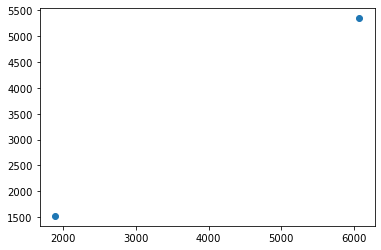

In [75]:
plt.scatter(NEWColDatadf['Apps'], NEWColDatadf['Accept'])

## 5. Conclusions

## 6. Limitations, Alternative Approaches, and Next Steps